## Quantum Fourier Transform
In this notebook, we write the code for the Quantum Fourier Transform using Qiskit. The code is designed for an arbitrary number of qubits

References:
- Qiskit Textbook, Quantum Fourier Transform: https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html

- Nielsen, M., & Chuang, I. (2010). Quantum Computation and Quantum Information: 10th Anniversary Edition. Cambridge: Cambridge University Press.


In [1]:
import numpy as np
# importing Qiskit
from qiskit import QuantumCircuit


We can start by doing an example for 3 qubits. First, we apply a Hadamard gate in the last qubit, qubit 2, and then apply controlled rotations using qubit 2 and the PRECEDING qubits

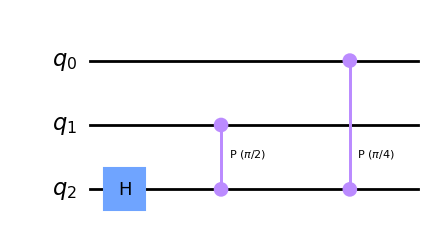

In [2]:
qc = QuantumCircuit(3)
qc.h(2)
qc.cp(np.pi/2, 1, 2)
qc.cp(np.pi/4, 0, 2)
qc.draw('mpl')


We then do the same for qubit 1, but this time we will only have one PRECEDING qubit.

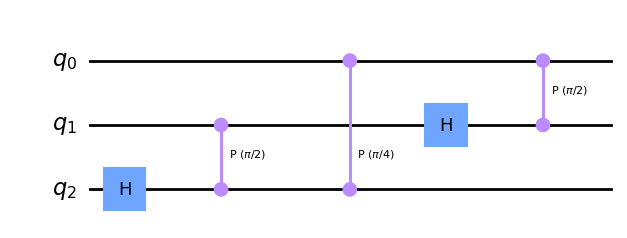

In [3]:
qc.h(1)
qc.cp(np.pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.draw('mpl')

Finally, we do the same for qubit 0, but it has no preceding qubits, so it's only a Hadamard gate.

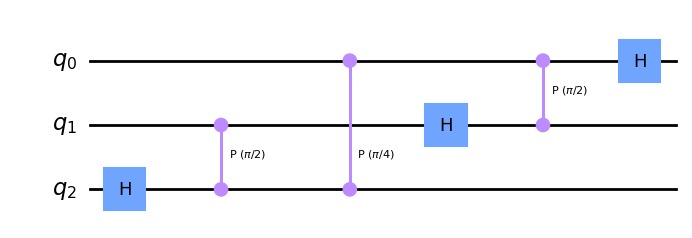

In [4]:
qc.h(0)
qc.draw('mpl')

We need to perform a swap before we complete the circuit, so we invert the order of the qubits. For 3 qubits, we only need one swap gate.

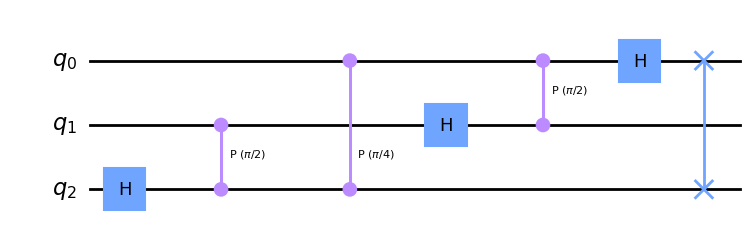

In [5]:
qc.swap(0,2)
qc.draw('mpl')

We can now generalize the code for an arbitraty number of qubits

In [6]:
def qft_rotations(n):
    ''' Apply the rotarions for Quantum Fourier Transform
    n: Number of Qubits
    '''
    list_qubits = range(n)
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(n-1-i)
        for j in range(n-1-i):
            p = np.pi/(2**(j+1))
            qc.cp(p, j, n-1-i)
    return qc

def qft_swaps(n):
    ''' Apply the swaps for the Quantum Fourier Transform
    n: Number of qubits
    '''
    qc = QuantumCircuit(n)
    for j in range(n//2):
        qc.swap(j, n-j-1)
    return qc

def qft(n_qubits):
    ''' Apply Quantum Fourier Transform in n qubits. Performs qubits swap at the end
    n_qubits: Number of qubits
    '''
    qc = QuantumCircuit(n_qubits)
    qc.append(qft_rotations(n_qubits), range(n_qubits))
    qc.append(qft_swaps(n_qubits), range(n_qubits))

    return qc
    
        

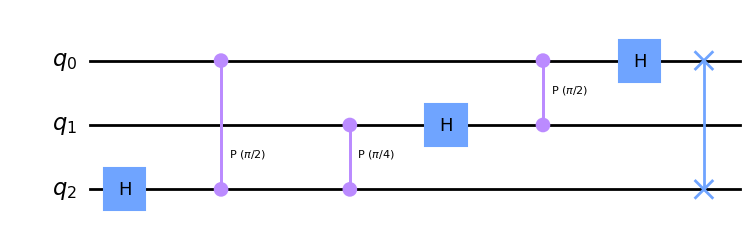

In [7]:
qc = qft(3)
qc.decompose().draw('mpl')

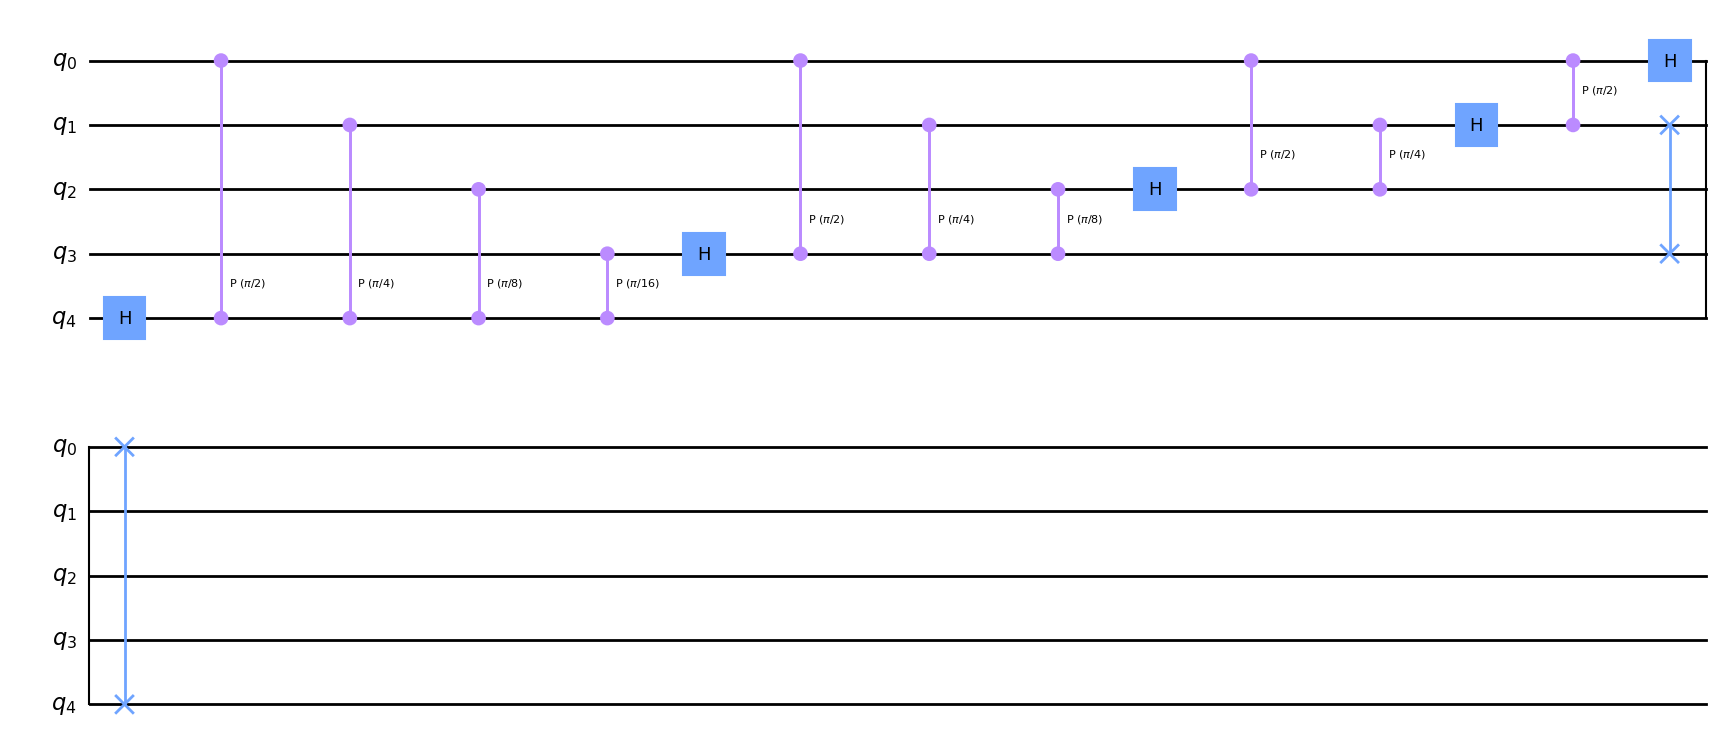

In [8]:
qc = qft(5)
qc.decompose().draw('mpl')